# Phase 2 :

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
url="C:/Users/HP/Documents/IT/CPIT-440/CPIT440 Project/bank/bank-full.csv"
bank=pd.read_csv(url, sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank.columns=['age','job','marital','education','own_credit_in_default','balance','housing_loan','personal_loan','contact_communication_type','last_contact_day','last_contact_month','last_contact_duration','current_campaign_contacts',"passed_days_after_last_contact_from_previous_campaign",'total_no_contacts_before_current_campaign','outcome_of_last_campaign','term_deposit_subscribed']
bank

,age,job,marital,education,own_credit_in_default,balance,housing_loan,personal_loan,contact_communication_type,last_contact_day,last_contact_month,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,outcome_of_last_campaign,term_deposit_subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## 2-1 Handling Duplication :

In [4]:
bank.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [5]:
dup_rows = bank[bank.duplicated(subset=None, keep='first')]
dup_rows

,age,job,marital,education,own_credit_in_default,balance,housing_loan,personal_loan,contact_communication_type,last_contact_day,last_contact_month,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,outcome_of_last_campaign,term_deposit_subscribed


## 2-2 Train / Test Split :

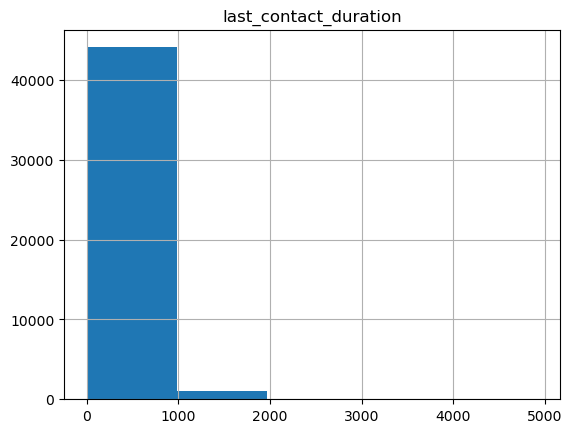

In [6]:
bank.hist(column='last_contact_duration', bins=5)
plt.show()

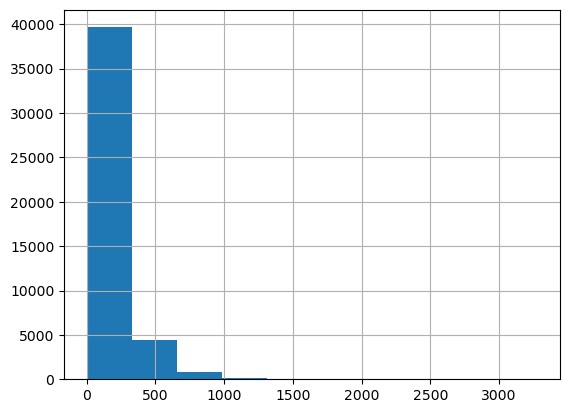

In [7]:
bank["duration"] = np.ceil(bank["last_contact_duration"]*(2/3))
bank["duration"].hist()
plt.show()

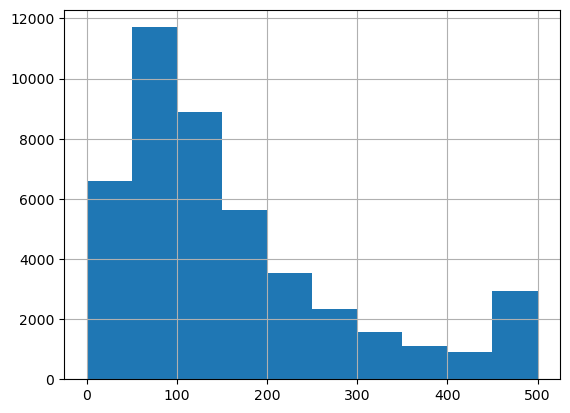

In [8]:
bank["duration"].where(bank["duration"] < 500, 500.0, inplace=True)
bank["duration"].hist()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bank, test_size=0.2, random_state=42,stratify=bank['duration'])

In [10]:
bank["duration"].value_counts()/len(bank)

500.0    0.050342
60.0     0.007985
82.0     0.007587
76.0     0.007542
54.0     0.007299
           ...   
459.0    0.000111
483.0    0.000111
499.0    0.000111
0.0      0.000066
1.0      0.000044
Name: duration, Length: 501, dtype: float64

In [11]:
train_set["duration"].value_counts()/len(train_set)

500.0    0.050348
60.0     0.007990
82.0     0.007576
76.0     0.007548
54.0     0.007299
           ...   
499.0    0.000111
459.0    0.000111
483.0    0.000111
0.0      0.000083
1.0      0.000055
Name: duration, Length: 501, dtype: float64

In [12]:
test_set["duration"].value_counts()/len(test_set)

500.0    0.050315
60.0     0.007962
82.0     0.007630
76.0     0.007520
84.0     0.007298
           ...   
497.0    0.000111
399.0    0.000111
459.0    0.000111
457.0    0.000111
477.0    0.000111
Name: duration, Length: 499, dtype: float64

In [13]:
train_set=train_set.drop("duration", axis=1)
test_set=test_set.drop("duration", axis=1)

In [14]:
train_set

,age,job,marital,education,own_credit_in_default,balance,housing_loan,personal_loan,contact_communication_type,last_contact_day,last_contact_month,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,outcome_of_last_campaign,term_deposit_subscribed
23613,48,technician,married,secondary,no,1548,no,no,cellular,28,aug,143,5,-1,0,unknown,no
32331,29,admin.,married,secondary,no,2121,no,no,cellular,16,apr,281,1,342,2,other,no
44279,82,retired,married,primary,no,243,no,no,cellular,26,jul,275,1,180,2,success,yes
25855,53,management,divorced,tertiary,no,26306,yes,no,cellular,19,nov,67,3,-1,0,unknown,no
7259,23,technician,married,secondary,no,8254,yes,no,unknown,29,may,409,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,55,blue-collar,married,secondary,no,1328,yes,no,unknown,15,may,100,1,-1,0,unknown,no
10298,49,admin.,divorced,secondary,no,1709,yes,no,unknown,12,jun,106,1,-1,0,unknown,no
13669,31,management,single,tertiary,no,409,no,yes,cellular,9,jul,564,5,-1,0,unknown,yes
31100,26,student,single,secondary,no,620,no,no,cellular,17,feb,104,1,-1,0,unknown,yes


In [15]:
test_set

,age,job,marital,education,own_credit_in_default,balance,housing_loan,personal_loan,contact_communication_type,last_contact_day,last_contact_month,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,outcome_of_last_campaign,term_deposit_subscribed
38748,51,technician,married,secondary,no,614,yes,no,cellular,18,may,9,4,-1,0,unknown,no
8811,27,management,single,tertiary,no,99,yes,no,unknown,4,jun,767,2,-1,0,unknown,yes
25084,43,technician,married,secondary,no,17655,yes,no,cellular,18,nov,31,1,-1,0,unknown,no
2758,50,admin.,married,secondary,no,1917,yes,no,unknown,14,may,200,2,-1,0,unknown,no
27590,31,services,married,secondary,yes,-158,yes,no,cellular,21,nov,214,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,50,blue-collar,married,unknown,no,1389,yes,no,unknown,19,jun,162,3,-1,0,unknown,no
20010,48,blue-collar,married,secondary,no,2083,no,no,cellular,8,aug,88,3,-1,0,unknown,no
19385,52,blue-collar,married,primary,no,10,no,no,cellular,6,aug,588,3,-1,0,unknown,no
42698,27,student,single,secondary,no,2245,no,no,cellular,18,jan,163,1,-1,0,unknown,no


In [16]:
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

In [17]:
train_set

,age,job,marital,education,own_credit_in_default,balance,housing_loan,personal_loan,contact_communication_type,last_contact_day,last_contact_month,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,outcome_of_last_campaign,term_deposit_subscribed
0,48,technician,married,secondary,no,1548,no,no,cellular,28,aug,143,5,-1,0,unknown,no
1,29,admin.,married,secondary,no,2121,no,no,cellular,16,apr,281,1,342,2,other,no
2,82,retired,married,primary,no,243,no,no,cellular,26,jul,275,1,180,2,success,yes
3,53,management,divorced,tertiary,no,26306,yes,no,cellular,19,nov,67,3,-1,0,unknown,no
4,23,technician,married,secondary,no,8254,yes,no,unknown,29,may,409,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,55,blue-collar,married,secondary,no,1328,yes,no,unknown,15,may,100,1,-1,0,unknown,no
36164,49,admin.,divorced,secondary,no,1709,yes,no,unknown,12,jun,106,1,-1,0,unknown,no
36165,31,management,single,tertiary,no,409,no,yes,cellular,9,jul,564,5,-1,0,unknown,yes
36166,26,student,single,secondary,no,620,no,no,cellular,17,feb,104,1,-1,0,unknown,yes


In [18]:
test_set

,age,job,marital,education,own_credit_in_default,balance,housing_loan,personal_loan,contact_communication_type,last_contact_day,last_contact_month,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,outcome_of_last_campaign,term_deposit_subscribed
0,51,technician,married,secondary,no,614,yes,no,cellular,18,may,9,4,-1,0,unknown,no
1,27,management,single,tertiary,no,99,yes,no,unknown,4,jun,767,2,-1,0,unknown,yes
2,43,technician,married,secondary,no,17655,yes,no,cellular,18,nov,31,1,-1,0,unknown,no
3,50,admin.,married,secondary,no,1917,yes,no,unknown,14,may,200,2,-1,0,unknown,no
4,31,services,married,secondary,yes,-158,yes,no,cellular,21,nov,214,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,50,blue-collar,married,unknown,no,1389,yes,no,unknown,19,jun,162,3,-1,0,unknown,no
9039,48,blue-collar,married,secondary,no,2083,no,no,cellular,8,aug,88,3,-1,0,unknown,no
9040,52,blue-collar,married,primary,no,10,no,no,cellular,6,aug,588,3,-1,0,unknown,no
9041,27,student,single,secondary,no,2245,no,no,cellular,18,jan,163,1,-1,0,unknown,no


## 2-3 Divide the dataset into Dependent & Independent variable :

In [19]:
train_X = train_set.drop("term_deposit_subscribed", axis=1)
train_y = train_set["term_deposit_subscribed"].copy()
test_X = test_set.drop("term_deposit_subscribed", axis=1)
test_y = test_set["term_deposit_subscribed"].copy()

In [20]:
bank=train_X

## 2-4 Data cleaning :

* For numeric missing attributes :

In [21]:
imputer = SimpleImputer(missing_values=-1,strategy='median')

Now we will split the catogrical atteributes from numeric attributes

In [22]:
bank_num_attributes = bank.drop(columns=['job','marital','education','own_credit_in_default','housing_loan','personal_loan','contact_communication_type','last_contact_month','outcome_of_last_campaign'], axis=1) 
bank_num_attributes

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign
0,48,1548,28,143,5,-1,0
1,29,2121,16,281,1,342,2
2,82,243,26,275,1,180,2
3,53,26306,19,67,3,-1,0
4,23,8254,29,409,3,-1,0
...,...,...,...,...,...,...,...
36163,55,1328,15,100,1,-1,0
36164,49,1709,12,106,1,-1,0
36165,31,409,9,564,5,-1,0
36166,26,620,17,104,1,-1,0


In [23]:
imputer.fit(bank_num_attributes)

SimpleImputer(missing_values=-1, strategy='median')

In [24]:
imputer.statistics_

array([ 39., 453.,  16., 180.,   2., 195.,   0.])

In [25]:
X = imputer.transform(bank_num_attributes)

In [26]:
bank_tr = pd.DataFrame(X, columns=bank_num_attributes.columns)

bank_tr :refers to numerical train inputs without missing value 

In [27]:
bank_tr

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign
0,48.0,1548.0,28.0,143.0,5.0,195.0,0.0
1,29.0,2121.0,16.0,281.0,1.0,342.0,2.0
2,82.0,243.0,26.0,275.0,1.0,180.0,2.0
3,53.0,26306.0,19.0,67.0,3.0,195.0,0.0
4,23.0,8254.0,29.0,409.0,3.0,195.0,0.0
...,...,...,...,...,...,...,...
36163,55.0,1328.0,15.0,100.0,1.0,195.0,0.0
36164,49.0,1709.0,12.0,106.0,1.0,195.0,0.0
36165,31.0,409.0,9.0,564.0,5.0,195.0,0.0
36166,26.0,620.0,17.0,104.0,1.0,195.0,0.0


* For categorical missing attributes

In [28]:
imp_cat = SimpleImputer(missing_values='unknown', strategy='most_frequent')
bank_cat_attributes=bank.drop(columns=['age','balance','last_contact_day','last_contact_duration','current_campaign_contacts',"passed_days_after_last_contact_from_previous_campaign",'total_no_contacts_before_current_campaign'], axis=1) 
bank_cat_attributes

,job,marital,education,own_credit_in_default,housing_loan,personal_loan,contact_communication_type,last_contact_month,outcome_of_last_campaign
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,admin.,married,secondary,no,no,no,cellular,apr,other
2,retired,married,primary,no,no,no,cellular,jul,success
3,management,divorced,tertiary,no,yes,no,cellular,nov,unknown
4,technician,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
36163,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
36164,admin.,divorced,secondary,no,yes,no,unknown,jun,unknown
36165,management,single,tertiary,no,no,yes,cellular,jul,unknown
36166,student,single,secondary,no,no,no,cellular,feb,unknown


In [29]:
imp_cat.fit(bank_cat_attributes)

SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [30]:
imp_cat.statistics_

array(['blue-collar', 'married', 'secondary', 'no', 'yes', 'no',
       'cellular', 'may', 'failure'], dtype=object)

In [31]:
X = imp_cat.transform(bank_cat_attributes)

In [32]:
bank_tr_cat = pd.DataFrame(X, columns=bank_cat_attributes.columns)

In [33]:
bank_tr_cat

,job,marital,education,own_credit_in_default,housing_loan,personal_loan,contact_communication_type,last_contact_month,outcome_of_last_campaign
0,technician,married,secondary,no,no,no,cellular,aug,failure
1,admin.,married,secondary,no,no,no,cellular,apr,other
2,retired,married,primary,no,no,no,cellular,jul,success
3,management,divorced,tertiary,no,yes,no,cellular,nov,failure
4,technician,married,secondary,no,yes,no,cellular,may,failure
...,...,...,...,...,...,...,...,...,...
36163,blue-collar,married,secondary,no,yes,no,cellular,may,failure
36164,admin.,divorced,secondary,no,yes,no,cellular,jun,failure
36165,management,single,tertiary,no,no,yes,cellular,jul,failure
36166,student,single,secondary,no,no,no,cellular,feb,failure


## 2-5 Handeling the categorical attributes :

In [34]:
#handle job attribute
bank_cat_job=bank_tr_cat['job']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_job.factorize(sort=True)
encoder_job = OneHotEncoder()
bank_cat_job_1hot = encoder_job.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_job_1hot=bank_cat_job_1hot.toarray()
bank_cat_job =pd.DataFrame(bank_cat_job_1hot,columns=bank_categories.tolist()) 
bank_cat_job

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
#handle marital attribute
bank_cat_marital=bank_tr_cat['marital']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_marital.factorize(sort=True)
encoder_marital = OneHotEncoder()
bank_cat_marital_1hot = encoder_marital.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_marital_1hot=bank_cat_marital_1hot.toarray()
bank_cat_marital =pd.DataFrame(bank_cat_marital_1hot,columns=bank_categories.tolist()) 
bank_cat_marital

,divorced,married,single
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
36163,0.0,1.0,0.0
36164,1.0,0.0,0.0
36165,0.0,0.0,1.0
36166,0.0,0.0,1.0


In [36]:
#handle education attribute
bank_cat_education=bank_tr_cat['education']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_education.factorize(sort=True)
encoder_education = OneHotEncoder()
bank_cat_education_1hot = encoder_education.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_education_1hot=bank_cat_education_1hot.toarray()
bank_cat_education =pd.DataFrame(bank_cat_education_1hot,columns=bank_categories.tolist()) 
bank_cat_education

,primary,secondary,tertiary
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
36163,0.0,1.0,0.0
36164,0.0,1.0,0.0
36165,0.0,0.0,1.0
36166,0.0,1.0,0.0


In [37]:
#handle own_credit_in_default attribute
bank_cat_own_credit=bank_tr_cat['own_credit_in_default']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_own_credit.factorize(sort=True)
encoder_own_credit = OneHotEncoder()
bank_cat_own_credit_1hot = encoder_own_credit.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_own_credit_1hot=bank_cat_own_credit_1hot.toarray()
bank_cat_own_credit =pd.DataFrame(bank_cat_own_credit_1hot,columns=bank_categories.tolist()) 
bank_cat_own_credit

,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
36163,1.0,0.0
36164,1.0,0.0
36165,1.0,0.0
36166,1.0,0.0


In [38]:
#handle housing_loan attribute
bank_cat_housing_loan=bank_tr_cat['housing_loan']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_housing_loan.factorize(sort=True)
encoder_housing_loan = OneHotEncoder()
bank_cat_housing_loan_1hot = encoder_housing_loan.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_housing_loan_1hot=bank_cat_housing_loan_1hot.toarray()
bank_cat_housing_loan =pd.DataFrame(bank_cat_housing_loan_1hot,columns=bank_categories.tolist()) 
bank_cat_housing_loan

,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
36163,0.0,1.0
36164,0.0,1.0
36165,1.0,0.0
36166,1.0,0.0


In [39]:
#handle personal_loan attribute
bank_cat_personal_loan=bank_tr_cat['personal_loan']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_personal_loan.factorize(sort=True)
encoder_personal_loan = OneHotEncoder()
bank_cat_personal_loan_1hot = encoder_personal_loan.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_personal_loan_1hot=bank_cat_personal_loan_1hot.toarray()
bank_cat_personal_loan =pd.DataFrame(bank_cat_personal_loan_1hot,columns=bank_categories.tolist()) 
bank_cat_personal_loan

,no,yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
36163,1.0,0.0
36164,1.0,0.0
36165,0.0,1.0
36166,1.0,0.0


In [40]:
#handle contact_communication_type attribute
bank_cat_contact_communication_type=bank_tr_cat['contact_communication_type']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_contact_communication_type.factorize(sort=True)
encoder_contact_communication_type = OneHotEncoder()
bank_cat_contact_communication_type_1hot = encoder_contact_communication_type.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_contact_communication_type_1hot=bank_cat_contact_communication_type_1hot.toarray()
bank_cat_contact_communication_type =pd.DataFrame(bank_cat_contact_communication_type_1hot,columns=bank_categories.tolist()) 
bank_cat_contact_communication_type

,cellular,telephone
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
36163,1.0,0.0
36164,1.0,0.0
36165,1.0,0.0
36166,1.0,0.0


In [41]:
#handle last_contact_month attribute
bank_cat_last_contact_month =bank_tr_cat['last_contact_month']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_last_contact_month.factorize(sort=True)
encoder_last_contact_month = OneHotEncoder()
bank_cat_last_contact_month_1hot = encoder_last_contact_month.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_last_contact_month_1hot=bank_cat_last_contact_month_1hot.toarray()
bank_cat_last_contact_month =pd.DataFrame(bank_cat_last_contact_month_1hot,columns=bank_categories.tolist()) 
bank_cat_last_contact_month

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36165,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#handle outcome_of_last_campaign attribute
bank_cat_outcome_of_last_campaign=bank_tr_cat['outcome_of_last_campaign']  # we use bank_tr_cat because it doesn't have missing value
bank_cat_encoded, bank_categories = bank_cat_outcome_of_last_campaign.factorize(sort=True)
encoder_outcome_of_last_campaign = OneHotEncoder()
bank_cat_outcome_of_last_campaign_1hot = encoder_outcome_of_last_campaign.fit_transform(bank_cat_encoded.reshape(-1,1))
bank_cat_outcome_of_last_campaign_1hot=bank_cat_outcome_of_last_campaign_1hot.toarray()
bank_cat_outcome_of_last_campaign =pd.DataFrame(bank_cat_outcome_of_last_campaign_1hot,columns=bank_categories.tolist()) 
bank_cat_outcome_of_last_campaign

,failure,other,success
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
36163,1.0,0.0,0.0
36164,1.0,0.0,0.0
36165,1.0,0.0,0.0
36166,1.0,0.0,0.0


## 2-6 Handlig outliers :


In [43]:
Q1 = bank_tr.quantile(0.25)
Q3 = bank_tr.quantile(0.75)
IQR = Q3 - Q1
IQR

age                                                        15.00
balance                                                  1351.25
last_contact_day                                           13.00
last_contact_duration                                     216.00
current_campaign_contacts                                   2.00
passed_days_after_last_contact_from_previous_campaign       0.00
total_no_contacts_before_current_campaign                   0.00
dtype: float64

In [44]:
outlier = ( bank_tr.min() < Q1-1.5*IQR) | (bank_tr.max() > Q3+1.5*IQR)
outlier

age                                                       True
balance                                                   True
last_contact_day                                         False
last_contact_duration                                     True
current_campaign_contacts                                 True
passed_days_after_last_contact_from_previous_campaign     True
total_no_contacts_before_current_campaign                 True
dtype: bool

In [45]:
outlier_index = ((bank_tr < (Q1 - 1.5 * IQR)) |(bank_tr > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_index

0        False
1         True
2         True
3         True
4         True
         ...  
36163    False
36164    False
36165    False
36166    False
36167     True
Length: 36168, dtype: bool

In [46]:
print(outlier_index.value_counts())

False    22526
True     13642
dtype: int64


In [47]:
bank_tr[outlier_index]

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign
1,29.0,2121.0,16.0,281.0,1.0,342.0,2.0
2,82.0,243.0,26.0,275.0,1.0,180.0,2.0
3,53.0,26306.0,19.0,67.0,3.0,195.0,0.0
4,23.0,8254.0,29.0,409.0,3.0,195.0,0.0
6,28.0,217.0,15.0,238.0,2.0,372.0,1.0
...,...,...,...,...,...,...,...
36150,40.0,8150.0,15.0,347.0,1.0,195.0,0.0
36151,55.0,2625.0,5.0,286.0,1.0,252.0,3.0
36152,48.0,4746.0,21.0,32.0,11.0,195.0,0.0
36158,43.0,519.0,20.0,973.0,2.0,195.0,0.0


## 2-7 Data transformation and scaling : 

In [48]:
scaler = StandardScaler()
scaler.fit(bank_tr)
scaled=scaler.transform(bank_tr)
scaled

array([[ 0.66015224,  0.06004078,  1.46422486, ...,  0.7214713 ,
        -0.10906423, -0.24492398],
       [-1.12453463,  0.24761895,  0.02392665, ..., -0.5701916 ,
         2.7935224 ,  0.59709024],
       [ 3.85380243, -0.36716603,  1.22417516, ..., -0.5701916 ,
        -0.40524654,  0.59709024],
       ...,
       [-0.93667285, -0.31282402, -0.8162473 , ...,  0.7214713 ,
        -0.10906423, -0.24492398],
       [-1.40632729, -0.24375073,  0.1439515 , ..., -0.5701916 ,
        -0.10906423, -0.24492398],
       [ 0.75408313, -0.38058786,  0.26397635, ..., -0.5701916 ,
        -0.68168336,  1.01809735]])

In [49]:
bank_scaled = pd.DataFrame(scaled, columns=bank_tr.columns)

In [50]:
bank_scaled

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign
0,0.660152,0.060041,1.464225,-0.446856,0.721471,-0.109064,-0.244924
1,-1.124535,0.247619,0.023927,0.087753,-0.570192,2.793522,0.597090
2,3.853802,-0.367166,1.224175,0.064509,-0.570192,-0.405247,0.597090
3,1.129807,8.164858,0.384001,-0.741279,0.075640,-0.109064,-0.244924
4,-1.688120,2.255327,1.584250,0.583622,0.075640,-0.109064,-0.244924
...,...,...,...,...,...,...,...
36163,1.317668,-0.011979,-0.096098,-0.613437,-0.570192,-0.109064,-0.244924
36164,0.754083,0.112746,-0.456173,-0.590193,-0.570192,-0.109064,-0.244924
36165,-0.936673,-0.312824,-0.816247,1.184089,0.721471,-0.109064,-0.244924
36166,-1.406327,-0.243751,0.143952,-0.597941,-0.570192,-0.109064,-0.244924


In [51]:
bank_train = pd.concat([bank_scaled, bank_cat_job,bank_cat_marital,bank_cat_education,bank_cat_own_credit,bank_cat_housing_loan,bank_cat_personal_loan,bank_cat_contact_communication_type,bank_cat_last_contact_month,bank_cat_outcome_of_last_campaign], axis=1)
bank_train

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,admin.,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,failure,other,success
0,0.660152,0.060041,1.464225,-0.446856,0.721471,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.124535,0.247619,0.023927,0.087753,-0.570192,2.793522,0.597090,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.853802,-0.367166,1.224175,0.064509,-0.570192,-0.405247,0.597090,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.129807,8.164858,0.384001,-0.741279,0.075640,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.688120,2.255327,1.584250,0.583622,0.075640,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,1.317668,-0.011979,-0.096098,-0.613437,-0.570192,-0.109064,-0.244924,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
36164,0.754083,0.112746,-0.456173,-0.590193,-0.570192,-0.109064,-0.244924,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36165,-0.936673,-0.312824,-0.816247,1.184089,0.721471,-0.109064,-0.244924,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36166,-1.406327,-0.243751,0.143952,-0.597941,-0.570192,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
bank_train.to_csv('train_X.csv',index=False)
train_y.to_csv('train_y.csv',index=False)

Now we will make the preprocessing on test set

In [53]:
#missing values - numeric
bank = test_X
bank_num_attributes = bank.drop(columns=['job','marital','education','own_credit_in_default','housing_loan','personal_loan','contact_communication_type','last_contact_month','outcome_of_last_campaign'], axis=1) 
X = imputer.transform(bank_num_attributes)
bank_tr = pd.DataFrame(X, columns=bank_num_attributes.columns)
#missing values - categorical
bank_cat_attributes=bank.drop(columns=['age','balance','last_contact_day','last_contact_duration','current_campaign_contacts',"passed_days_after_last_contact_from_previous_campaign",'total_no_contacts_before_current_campaign'], axis=1) 
X = imp_cat.transform(bank_cat_attributes)
bank_tr_cat = pd.DataFrame(X, columns=bank_cat_attributes.columns)

#categorical attribute - job
bank_cat_job=bank_tr_cat['job']
bank_cat_encoded, bank_categories = bank_cat_job.factorize(sort=True)
bank_cat_job_1hot = encoder_job.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_job_1hot=bank_cat_job_1hot.toarray()
bank_cat_job =pd.DataFrame(bank_cat_job_1hot,columns=bank_categories.tolist()) 

#categorical attribute - marital
bank_cat_marital=bank_tr_cat['marital'] 
bank_cat_encoded, bank_categories = bank_cat_marital.factorize(sort=True)
bank_cat_marital_1hot = encoder_marital.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_marital_1hot=bank_cat_marital_1hot.toarray()
bank_cat_marital =pd.DataFrame(bank_cat_marital_1hot,columns=bank_categories.tolist()) 

#categorical attribute - education
bank_cat_education=bank_tr_cat['education'] 
bank_cat_encoded, bank_categories = bank_cat_education.factorize(sort=True)
bank_cat_education_1hot = encoder_education.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_education_1hot=bank_cat_education_1hot.toarray()
bank_cat_education =pd.DataFrame(bank_cat_education_1hot,columns=bank_categories.tolist()) 

#categorical attribute - own_credit_in_default
bank_cat_own_credit=bank_tr_cat['own_credit_in_default'] 
bank_cat_encoded, bank_categories = bank_cat_own_credit.factorize(sort=True)
bank_cat_own_credit_1hot = encoder_own_credit.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_own_credit_1hot=bank_cat_own_credit_1hot.toarray()
bank_cat_own_credit =pd.DataFrame(bank_cat_own_credit_1hot,columns=bank_categories.tolist()) 

#categorical attribute - housing_loan 
bank_cat_housing_loan=bank_tr_cat['housing_loan']  
bank_cat_encoded, bank_categories = bank_cat_housing_loan.factorize(sort=True)
bank_cat_housing_loan_1hot = encoder_housing_loan.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_housing_loan_1hot=bank_cat_housing_loan_1hot.toarray()
bank_cat_housing_loan =pd.DataFrame(bank_cat_housing_loan_1hot,columns=bank_categories.tolist()) 

#categorical attribute - personal_loan 
bank_cat_personal_loan=bank_tr_cat['personal_loan'] 
bank_cat_encoded, bank_categories = bank_cat_personal_loan.factorize(sort=True)
bank_cat_personal_loan_1hot = encoder_personal_loan.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_personal_loan_1hot=bank_cat_personal_loan_1hot.toarray()
bank_cat_personal_loan =pd.DataFrame(bank_cat_personal_loan_1hot,columns=bank_categories.tolist()) 

#categorical attribute - communication_type 
bank_cat_contact_communication_type=bank_tr_cat['contact_communication_type'] 
bank_cat_encoded, bank_categories = bank_cat_contact_communication_type.factorize(sort=True)
bank_cat_contact_communication_type_1hot = encoder_contact_communication_type.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_contact_communication_type_1hot=bank_cat_contact_communication_type_1hot.toarray()
bank_cat_contact_communication_type =pd.DataFrame(bank_cat_contact_communication_type_1hot,columns=bank_categories.tolist()) 

#categorical attribute - last_contact_month
bank_cat_last_contact_month =bank_tr_cat['last_contact_month']  
bank_cat_encoded, bank_categories = bank_cat_last_contact_month.factorize(sort=True)
bank_cat_last_contact_month_1hot = encoder_last_contact_month.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_last_contact_month_1hot=bank_cat_last_contact_month_1hot.toarray()
bank_cat_last_contact_month =pd.DataFrame(bank_cat_last_contact_month_1hot,columns=bank_categories.tolist()) 

bank_cat_outcome_of_last_campaign=bank_tr_cat['outcome_of_last_campaign']  
bank_cat_encoded, bank_categories = bank_cat_outcome_of_last_campaign.factorize(sort=True)
bank_cat_outcome_of_last_campaign_1hot = encoder_outcome_of_last_campaign.transform(bank_cat_encoded.reshape(-1,1))
bank_cat_outcome_of_last_campaign_1hot=bank_cat_outcome_of_last_campaign_1hot.toarray()
bank_cat_outcome_of_last_campaign =pd.DataFrame(bank_cat_outcome_of_last_campaign_1hot,columns=bank_categories.tolist()) 

#standardization
scaled=scaler.transform(bank_tr)
bank_scaled = pd.DataFrame(scaled, columns=bank_tr.columns)

#concatenation of numerical and categorical
bank_test = pd.concat([bank_scaled, bank_cat_job,bank_cat_marital,bank_cat_education,bank_cat_own_credit,bank_cat_housing_loan,bank_cat_personal_loan,bank_cat_contact_communication_type,bank_cat_last_contact_month,bank_cat_outcome_of_last_campaign], axis=1)
#export to CSV files
bank_test.to_csv('test_X.csv',index=False)
test_y.to_csv('test_y.csv',index=False)

In [54]:
bank_test

,age,balance,last_contact_day,last_contact_duration,current_campaign_contacts,passed_days_after_last_contact_from_previous_campaign,total_no_contacts_before_current_campaign,admin.,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,failure,other,success
0,0.941945,-0.245715,0.263976,-0.965969,0.398556,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.312396,-0.414306,-1.416372,1.970506,-0.247276,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.190498,5.332853,0.263976,-0.880742,-0.570192,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.848014,0.180837,-0.216123,-0.226039,-0.247276,-0.109064,-0.244924,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.936673,-0.498438,0.624051,-0.171804,-0.247276,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,0.848014,0.007990,0.384001,-0.373251,0.075640,-0.109064,-0.244924,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9039,0.660152,0.235179,-0.936272,-0.659925,0.075640,-0.109064,-0.244924,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9040,1.035876,-0.443441,-1.176322,1.277064,0.075640,-0.109064,-0.244924,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9041,-1.312396,0.288212,0.263976,-0.369377,-0.570192,-0.109064,-0.244924,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
bank_cat_job

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9038,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9039,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9040,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 2-8 Models Training :

* Logistic Regression

In [56]:
reg = LogisticRegression()
reg.fit(bank_train, train_y)
scores = cross_val_score(reg, bank_train, train_y, cv=2, scoring="accuracy")
print("Accuracy of each fold:",scores)
y_train_pred=cross_val_predict(reg,bank_train,train_y, cv=2)
confusion_matrix(train_y, y_train_pred)
print(metrics.classification_report(train_y, y_train_pred))

Accuracy of each fold: [0.89863968 0.90466711]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31931
         yes       0.65      0.34      0.45      4237

    accuracy                           0.90     36168
   macro avg       0.79      0.66      0.70     36168
weighted avg       0.89      0.90      0.89     36168



* Decision Tree

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(bank_train, train_y)
scores = cross_val_score(dtc, bank_train, train_y, cv=3, scoring="accuracy")
print("Accuracy of each fold:",scores)
y_train_pred=cross_val_predict(dtc,bank_train,train_y, cv=2)
confusion_matrix(train_y, y_train_pred)
print(metrics.classification_report(train_y, y_train_pred))

Accuracy of each fold: [0.87076974 0.87441938 0.87599536]
              precision    recall  f1-score   support

          no       0.93      0.92      0.92     31931
         yes       0.44      0.45      0.44      4237

    accuracy                           0.87     36168
   macro avg       0.68      0.69      0.68     36168
weighted avg       0.87      0.87      0.87     36168



* support vector machine

In [58]:
svc = SVC()
svc.fit(bank_train, train_y)
scores = cross_val_score(svc, bank_train, train_y, cv=3, scoring="accuracy")
print("Accuracy of each fold:",scores)
y_train_pred=cross_val_predict(svc,bank_train,train_y, cv=3)
confusion_matrix(train_y, y_train_pred)
print(metrics.classification_report(train_y, y_train_pred))

Accuracy of each fold: [0.90096218 0.9026211  0.90328467]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31931
         yes       0.68      0.32      0.43      4237

    accuracy                           0.90     36168
   macro avg       0.80      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168



* Random Forest

In [59]:
rfc = RandomForestClassifier()
rfc.fit(bank_train, train_y)
scores = cross_val_score(rfc, bank_train, train_y, cv=3, scoring="accuracy")
print("Accuracy of each fold:",scores)
y_train_pred=cross_val_predict(rfc,bank_train,train_y, cv=3)
confusion_matrix(train_y, y_train_pred)
print(metrics.classification_report(train_y, y_train_pred))

Accuracy of each fold: [0.90444592 0.9036994  0.9049436 ]
              precision    recall  f1-score   support

          no       0.92      0.98      0.95     31931
         yes       0.66      0.36      0.46      4237

    accuracy                           0.90     36168
   macro avg       0.79      0.67      0.70     36168
weighted avg       0.89      0.90      0.89     36168



## 2-8 Models Evalution :

* For Logistic Regression model

In [60]:
model_list=['Logistic Regression','Decision Tree','Support Vector Machine','Randomforest']
acc_list=[]
precision_list=[]
recall_list=[]
predict_reg=reg.predict(bank_test)

In [61]:
accuracy=accuracy_score(test_y,predict_reg)
print(accuracy)
acc_list.append(accuracy)

0.8978215194072764


In [62]:
precision=precision_score(test_y,predict_reg,pos_label='yes')
print(precision)
precision_list.append(precision)

0.6180811808118081


In [63]:
recall=recall_score(test_y,predict_reg,pos_label='yes')
print(recall)
recall_list.append(recall)

0.31844106463878324


* For Decision tree model

In [64]:
predict_dtc=dtc.predict(bank_test)

In [65]:
accuracy=accuracy_score(test_y,predict_dtc)
print(accuracy)
acc_list.append(accuracy)

0.8682959194957426


In [66]:
precision=precision_score(test_y,predict_dtc, pos_label='yes')
print(precision)
precision_list.append(precision)

0.4385499557913351


In [67]:
recall=recall_score(test_y,predict_dtc,pos_label='yes')
print(recall)
recall_list.append(recall)

0.4714828897338403


* For support vector machine model

In [68]:
predict_svc=svc.predict(bank_test)

In [69]:
accuracy=accuracy_score(test_y,predict_svc)
print(accuracy)
acc_list.append(accuracy)

0.9031294924250802


In [70]:
precision_score(test_y,predict_svc,pos_label='yes')
print(precision)
precision_list.append(precision)

0.4385499557913351


In [71]:
recall=recall_score(test_y,predict_svc,pos_label='yes')
print(recall)
recall_list.append(recall)

0.32129277566539927


* For Randomforest model

In [72]:
predict_rfc=rfc.predict(bank_test)

In [73]:
accuracy=accuracy_score(test_y,predict_rfc)
print(accuracy)
acc_list.append(accuracy)

0.9058940617051864


In [74]:
precision=precision_score(test_y,predict_rfc,pos_label='yes')
print(precision)
precision_list.append(precision)

0.667779632721202


In [75]:
recall=recall_score(test_y,predict_rfc,pos_label='yes')
print(recall)
recall_list.append(recall)

0.38022813688212925


▪	Comparison of models’ performance using table or plots.

In [76]:
comparision_df=pd.DataFrame({'Model':model_list,'Accuracy': acc_list, 'Precision' :precision_list, 'Recall' :recall_list})
comparision_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.897822,0.618081,0.318441
1,Decision Tree,0.868296,0.438550,0.471483
2,Support Vector Machine,0.903129,0.438550,0.321293
3,Randomforest,0.905894,0.667780,0.380228


* Random forest has the most accuracy, precision, and recall performance metrics compared to other models 